In this homework, you are going to use the code from TrafficSignsClassification notebook and create your own traffic sign classifier.

Step 1
Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

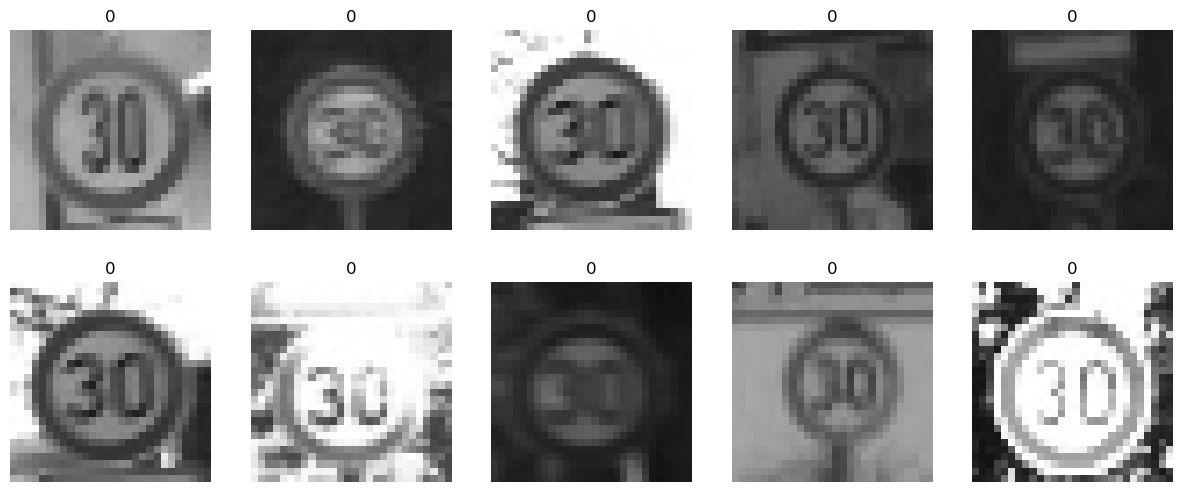

In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

folder = r"C:\Users\hanna\ComputerVision\Computer-Vision-v2-master\Computer-Vision-v2-master\lesson_12\data\subset_homework"

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)
    

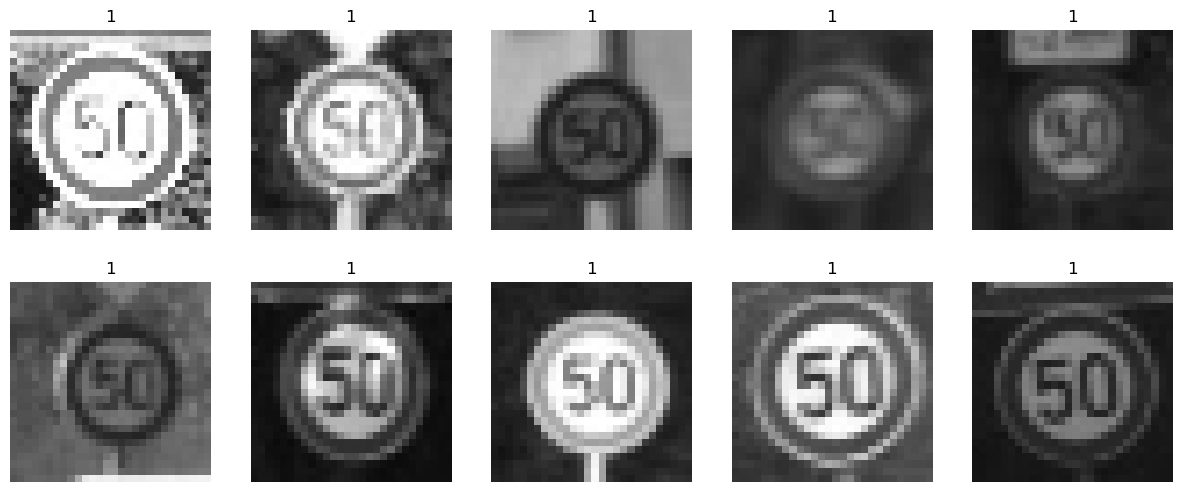

In [2]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [3]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [4]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [5]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.1546378135681152


In [6]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.023032665252685547


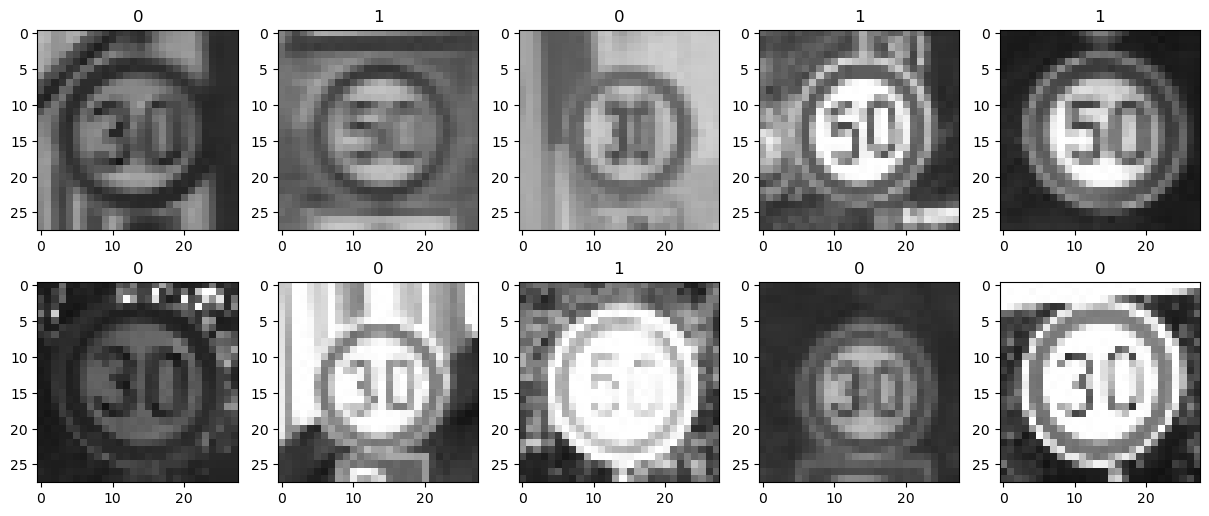

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [8]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [9]:
inputs = Input(shape=(pixels.shape[1], ))
layer1 = Dense(10, activation="relu")(inputs)
layer2 = Dense(20, activation="relu")(layer1)
outputs = Dense(1, activation="linear")(layer2)
model = Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,091 (31.61 KB)

 Trainable params: 8,091 (31.61 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [11]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2747
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1494
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1150
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0996
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1006
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0767
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0746
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0726
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0589


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

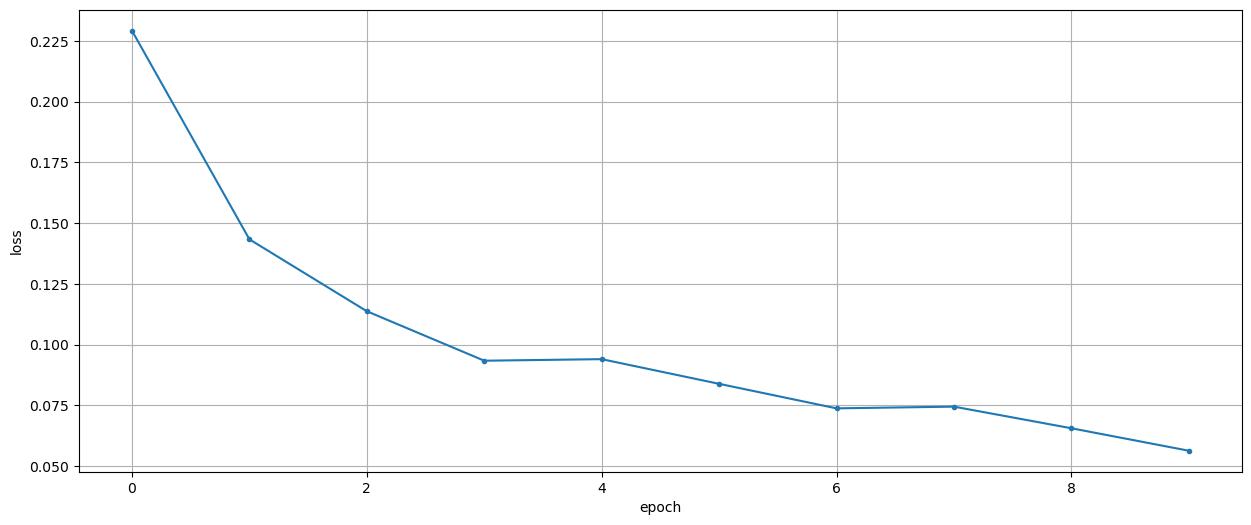

In [12]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[ 0.08281109  0.00762602 -0.07486337  0.          0.08442511  0.05221948
  0.00176634 -0.05616179  0.01880528  0.32880288] [ 0.08281109  0.00762602 -0.07486337  0.          0.08442511  0.05221948
  0.00176634 -0.05616179  0.01880528  0.32880288]


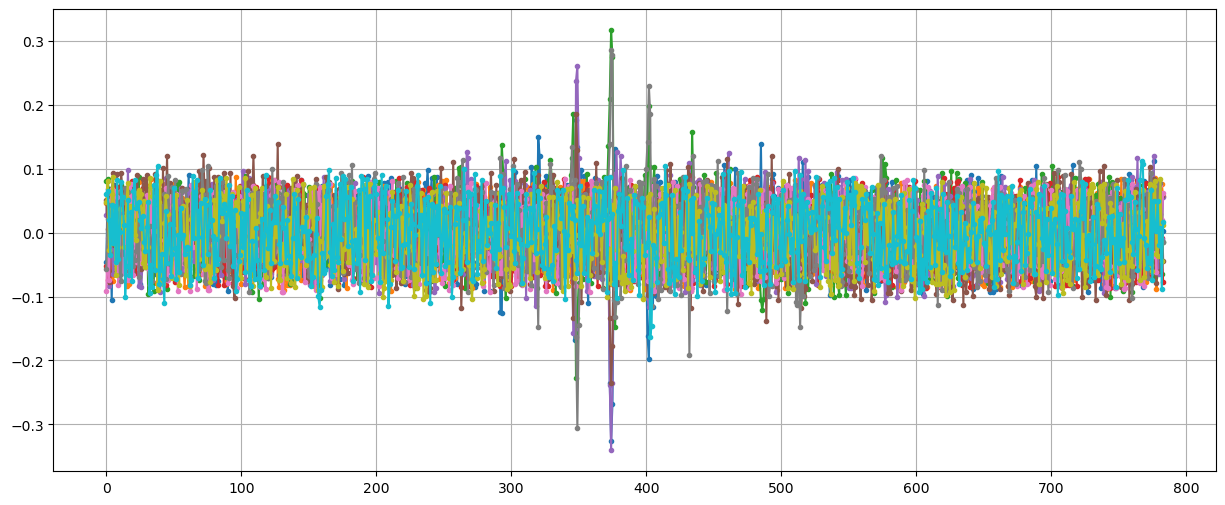

In [13]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.00261952]] 0
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy 0.9460850111856823


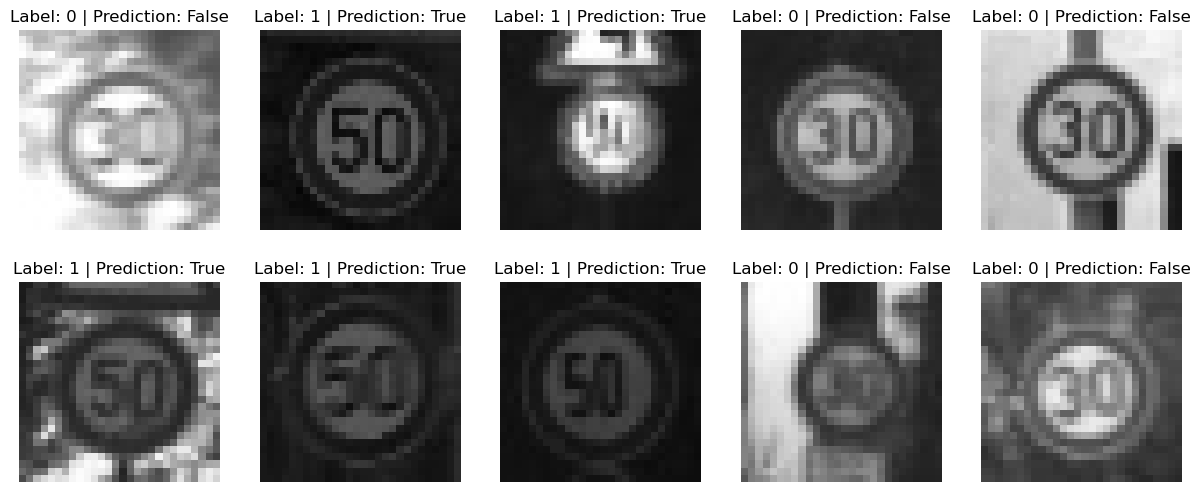

In [14]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

we have this ammount of images:
Num samples class_0 2220
Num samples class_1 2250

with this network: 
inputs = Input(shape=(pixels.shape[1], ))
layer1 = Dense(10, activation="relu")(inputs)
layer2 = Dense(20, activation="relu")(layer1)
layer3 = Dense(1, activation="linear")(layer2)
model = Model(inputs, outputs)

we have accuracy: Accuracy 0.8881431767337807

to increase accuracy we can:
add layers to capture more complex features in data, to better learn from the data

increase number of neurons that can help the network capture more details from the input. More neurons increase the capacity of each layer to learn and process more features.

use different non-linera actiavtion func-s.

add dropout layers to prevent overfitting, it ensures that the model doesn't simply memorize the training data.

normalization the input of each layer can speed up training and make the network more stable.

with this network: 
inputs = Input(shape=(pixels.shape[1], ))
layer1 = Dense(10, activation="relu")(inputs)
layer2 = Dense(20, activation="relu")(layer1)
outputs = Dense(1, activation="linear")(layer2)
model = Model(inputs, outputs)


we have accuracy:
Accuracy 0.9460850111856823



